## Importing libraries

In [1]:
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
LABEL_MAPPING = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss


## Loading the dataset, and preprocessing

In [9]:
df = pd.read_csv("data/data.csv")

labels = df.label.values
images = df.drop('label', axis=1).values.reshape(-1, 28, 28)

In [10]:
# Normalizing the images, ie, bringing them in the range of 0-1 from 0-255
# Make sure not to run this kernel twice or thrice, or it will shrink the values of image pixels very much

images = images / 255.0
images.max(), images.min()
# Ensure that the max value is 1, and min 0. Otherwise, run the previous and this kernel once.

(1.0, 0.0)

In [11]:
# Flatten the images, and do a train test split [We'll do a standard 80% train and 20% test split]
images = images.reshape(-1, 28*28)

X_train, X_test, y_train, y_test = train_test_split(images, labels, shuffle=True, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

In [19]:
# Initialize a new Logistic Regression model
# Applies L2 regularization by default, so we don't need to do that to prevent the weights from exploding

model = LogisticRegression(max_iter=1000)


In [20]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Getting the predictions, and checking the accuracy score
preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)*100:.4f}%")

Accuracy: 84.7167%


That's amazing, we created a 85% accurate LogiReg model with only 1000 iterations. Now let's calculate the Cross-Entropy loss

In [25]:
# Getting the probabilities for each class for each image
preds_probs = model.predict_proba(X_test)
print(f"Cross-Entropy loss: {log_loss(y_test, preds_probs)}")

Cross-Entropy loss: 0.43667873772465926


### A function to do prediction

In [ ]:
# This function will assume that the image being uploaded is a 28x28 image

def pred_sample(model, sample):    
    if isinstance(sample, np.ndarray):     # If the `sample` argument is a 
        assert sample.shape[-2:] == (28, 28) or sample.shape[-1] == 784, "Image(s) must have a shape of 28x28"
        img_arr = sample.reshape(1, -1)
        
        img = Image.fromarray(img_arr)
    if isinstance(sample, str):
        img = Image.open(sample).convert('L') 
        img = img.resize((28, 28))
        img_arr = np.array(img) / 255.0 
        img_arr = img_arr.reshape(1, -1) 
        
    pred = model.predict(img_arr)
    
    return pred[0]

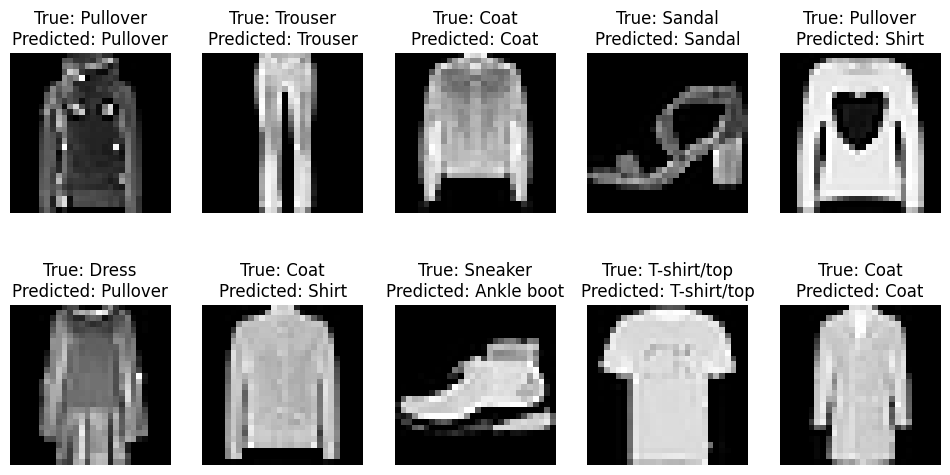

In [84]:
# Visualizing 10 predictions using the `pred_sample` function
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.ravel()

for i in range(10):
    true = LABEL_MAPPING[y_test[i]]
    pred = LABEL_MAPPING[pred_sample(model, X_test[i])]
    ax[i].imshow(X_test[i].reshape((28, 28)), cmap='gray')
    ax[i].set_title(f"True: {true}\nPredicted: {pred}")
    ax[i].axis("off")

plt.show()